# ELM instances in amyloid dataset

## Imports

In [1]:
import json
import pandas as pd

## Loading amyloid dataset
Loading the dataset and filtering

In [2]:
with open('../processed/kung_funding_filtered.json')as f:
    prots = json.load(f)

In [3]:
print(prots['P10275'])

{'name': 'Androgen receptor (Dihydrotestosterone receptor) (Nuclear receptor subfamily 3 group C member 4)', 'category_amyloids': 'Amylo', 'amypro_category': 'pathogenic', 'amyloid_peptides': '1-920'}


In [4]:
amylos = []
for prot in prots:
    if prots[prot]['category_amyloids'] == 'Amylo':
        amylos.append(prot)

In [5]:
for prot in prots:
    if prots[prot]['amypro_category'] != 'Ref':
        if prot not in amylos:
            amylos.append(prot)
            print(prot)

In [6]:
print(len(amylos))

81


In [7]:
print(amylos)

['P01189', 'P01241', 'P01275', 'P06850', 'P09681', 'P20366', 'P40967', 'P60852', 'Q01524', 'Q13546', 'Q8NB16', 'Q969E3', 'Q9UBU3', 'Q9Y572', 'A1E959', 'O14960', 'O14979', 'P00441', 'P01034', 'P01160', 'P01236', 'P01258', 'P01308', 'P02489', 'P02647', 'P02652', 'P02655', 'P02656', 'P02671', 'P02766', 'P02788', 'P04004', 'P04080', 'P04156', 'P04279', 'P04637', 'P05067', 'P05109', 'P06396', 'P06702', 'P06727', 'P06748', 'P07320', 'P0DJI8', 'P10275', 'P10636', 'P10997', 'P11686', 'P12036', 'P15309', 'P16860', 'P22303', 'P37840', 'P47929', 'P61626', 'P61769', 'Q08431', 'Q13148', 'Q15517', 'Q15582', 'Q71U36', 'Q99972', 'Q9Y287', 'O95838', 'P01178', 'P01185', 'P01282', 'P02743', 'P02768', 'P09758', 'P0DJI9', 'P13645', 'P22466', 'P34998', 'P43220', 'P48052', 'P61278', 'Q5BIV9', 'Q8IWL2', 'O43236', 'Q9UKY0']


## Loading ELM instances

In [8]:
df = pd.read_csv('../raw/elm_instances.tsv',sep='\t')

In [9]:
#ELM_Instance_Download_Version: 1.4
#ELM_Instance_Download_Date: 2022-11-01 03:57:45.538516
#Origin: asimov
#Type: tsv
#NumInstances: 3953

In [10]:
df

,Accession,ELMType,ELMIdentifier,ProteinName,Primary_Acc,Accessions,Start,End,References,Methods,InstanceLogic,PDB,Organism
0,ELMI003774,CLV,CLV_C14_Caspase3-7,A0A0H3NIK3_SALTS,A0A0H3NIK3,A0A0H3NIK3,483,487,20947770,enzymatic reaction; mutation analysis; proteas...,true positive,NaN,Salmonella enterica subsp. enterica serovar Ty...
1,ELMI002256,CLV,CLV_C14_Caspase3-7,ATN1_HUMAN,P54259,P54259 Q99495 Q99621 Q9UEK7,103,107,10085113 9535906,cleavage reaction; mutation analysis; western ...,true positive,NaN,Homo sapiens
2,ELMI001933,CLV,CLV_C14_Caspase3-7,ATN1_HUMAN,P54259,P54259 Q99495 Q99621 Q9UEK7,106,110,10085113 9535906,cleavage reaction; mutation analysis; western ...,true positive,NaN,Homo sapiens
3,ELMI001914,CLV,CLV_C14_Caspase3-7,BCAR1_RAT,Q63767,Q63767 Q63766,413,417,10712510,classical fluorescence spectroscopy; cleavage ...,true positive,NaN,Rattus norvegicus
4,ELMI001915,CLV,CLV_C14_Caspase3-7,BCAR1_RAT,Q63767,Q63767 Q63766,745,749,10712510,classical fluorescence spectroscopy; cleavage ...,true positive,NaN,Rattus norvegicus
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3948,ELMI000012,TRG,TRG_PTS1,LUCI_PHOPY,P08659,P08659 Q27755,547,550,2654139,mutation analysis,true positive,NaN,Photinus pyralis
3949,ELMI001101,TRG,TRG_PTS1,NLTP_HUMAN,P22307,P22307 D3DQ37 Q15432 Q16622 Q5VVZ1 Q99430,544,547,17157249,x-ray crystallography,true positive,2C0L,Homo sapiens
3950,ELMI000010,TRG,TRG_PTS1,Q28956_PIG,Q28956,Q28956,734,737,10088725,competition binding; mutation analysis,true positive,NaN,Sus scrofa
3951,ELMI000090,TRG,TRG_PTS2,ALF_TRYBB,P07752,P07752,1,12,10891264,x-ray crystallography,true positive,1F2J,Trypanosoma brucei brucei


In [11]:
df = df.transpose()

## Filtering amylos with ELM instances

### Printing all ELM instances that appear in the dataset

In [12]:
n = 0
amylos_with_slims = {}
for instance in df:
    column = df[instance]
    ProteinName = column['ProteinName']
    Accessions = column['Accessions']
    ELMIdentifier = column['ELMIdentifier']
    InstanceLogic = column['InstanceLogic']
    Start = column['Start']
    End = column['End']
    ELM_Accession = column['Accession']
    References = column['References']
    if InstanceLogic == 'true positive':
        Accessions = Accessions.split()
        for Accession in Accessions:
            for amylo_ID in amylos:
                if amylo_ID == Accession:
                    n += 1
                    print(amylo_ID,'\t',Accession,'\t',ELMIdentifier,'\t',InstanceLogic,'\t',ProteinName)
                    try:
                        amylos_with_slims[amylo_ID][ELMIdentifier].append({'span':(Start,End),'ELM_Accession':ELM_Accession,'References':References})
                    except:
                        try:
                            amylos_with_slims[amylo_ID][ELMIdentifier] = [{'span':(Start,End),'ELM_Accession':ELM_Accession,'References':References}]
                        except:
                            amylos_with_slims[amylo_ID] = {ELMIdentifier:[{'span':(Start,End),'ELM_Accession':ELM_Accession,'References':References}]}
#     if InstanceLogic == 'false positive':
#         Accessions = Accessions.split()
#         for Accession in Accessions:
#             for amylo_ID in amylos:
#                 if amylo_ID == Accession:
#                     n += 1
#                     print(amylo_ID,'\t',Accession,'\t',ELMIdentifier,'\t',InstanceLogic,'\t',ProteinName)
print(n)

P04637 	 P04637 	 DEG_MDM2_SWIB_1 	 true positive 	 P53_HUMAN
P04637 	 P04637 	 DOC_CYCLIN_RxL_1 	 true positive 	 P53_HUMAN
P04637 	 P04637 	 DOC_USP7_MATH_1 	 true positive 	 P53_HUMAN
P04637 	 P04637 	 DOC_USP7_MATH_1 	 true positive 	 P53_HUMAN
P05067 	 P05067 	 DOC_WW_Pin1_4 	 true positive 	 A4_HUMAN
P05067 	 P05067 	 DOC_WW_Pin1_4 	 true positive 	 A4_HUMAN
P04637 	 P04637 	 DOC_WW_Pin1_4 	 true positive 	 P53_HUMAN
P04637 	 P04637 	 DOC_WW_Pin1_4 	 true positive 	 P53_HUMAN
P04637 	 P04637 	 DOC_WW_Pin1_4 	 true positive 	 P53_HUMAN
P10636 	 P10636 	 DOC_WW_Pin1_4 	 true positive 	 TAU_HUMAN
Q71U36 	 Q71U36 	 LIG_CAP-Gly_1 	 true positive 	 TBA1A_HUMAN
P04004 	 P04004 	 LIG_Integrin_RGD_1 	 true positive 	 VTNC_HUMAN
P05067 	 P05067 	 LIG_PTB_Apo_2 	 true positive 	 A4_HUMAN
P05067 	 P05067 	 LIG_SH2_GRB2like 	 true positive 	 A4_HUMAN
P05067 	 P05067 	 LIG_SH2_GRB2like 	 true positive 	 A4_HUMAN
P10636 	 P10636 	 LIG_SH3_1 	 true positive 	 TAU_HUMAN
P10636 	 P10636 	 LIG_SH3_

### Joining the datasets
Filtering the amiloid dataset by amiloids containing instances and saving it as a nested dictionary of the shape:
```
{
    amylo_ID1: {
    	ELM_class1: {
    		amylo_span: 1-393,
    		slim_span: (19, 26),
    		instance_accsesion: ELMI002838,
    		References: 25591003 17284038 8875929,
        },
        ELM_class2: {...},
        ...
    },
    amylo_ID2: {...},
    ...
}
```

In [13]:
for amylo_ID in amylos_with_slims:
    elm_classes_in_amylo = amylos_with_slims[amylo_ID]
    amylo_span = prots[amylo_ID]['amyloid_peptides']
    print('amylo_ID:',amylo_ID,',','amylo_span:',amylo_span)
    for elm_class in elm_classes_in_amylo:
        instances_in_amylo = elm_classes_in_amylo[elm_class]
        print('\t'+'ELM_class:',elm_class)
        for slim in instances_in_amylo: #un mismo amylo puede tener mas de una instancia del mismo slim en su secuencia
            slim_span = slim['span']
            ELM_Accession = slim['ELM_Accession']
            References = slim['References']
            print('\t'+'-'+'\t'+'amylo_span:',str(amylo_span))
            print('\t'+'\t'+'slim_span:',str(slim_span))
            print('\t'+'\t'+'instance_accsesion:',ELM_Accession)
            print('\t'+'\t'+'References:',References)

amylo_ID: P04637 , amylo_span: 1-393
	ELM_class: DEG_MDM2_SWIB_1
	-	amylo_span: 1-393
		slim_span: (19, 26)
		instance_accsesion: ELMI002838
		References: 25591003 17284038 8875929
	ELM_class: DOC_CYCLIN_RxL_1
	-	amylo_span: 1-393
		slim_span: (378, 388)
		instance_accsesion: ELMI000051
		References: 12501191 10884347
	ELM_class: DOC_USP7_MATH_1
	-	amylo_span: 1-393
		slim_span: (359, 363)
		instance_accsesion: ELMI001067
		References: 16474402 16402859
	-	amylo_span: 1-393
		slim_span: (364, 368)
		instance_accsesion: ELMI001068
		References: 16474402
	ELM_class: DOC_WW_Pin1_4
	-	amylo_span: 1-393
		slim_span: (30, 35)
		instance_accsesion: ELMI001957
		References: 12388558
	-	amylo_span: 1-393
		slim_span: (78, 83)
		instance_accsesion: ELMI001995
		References: 12397362
	-	amylo_span: 1-393
		slim_span: (312, 317)
		instance_accsesion: ELMI001996
		References: 12397362
	ELM_class: MOD_CDK_SPxxK_3
	-	amylo_span: 1-393
		slim_span: (312, 319)
		instance_accsesion: ELMI003229
		Referenc

We found 12 amiloid proteins with known instances of slims

In [14]:
print(len(amylos_with_slims))

12


Example found

In [15]:
prots['P22303']

{'name': 'Acetylcholinesterase (AChE) (EC 3.1.1.7)',
 'category_amyloids': 'Amylo',
 'amypro_category': 'pathogenic',
 'amyloid_peptides': '32-614'}

Printing with protein names

In [16]:
for amylo_ID in amylos_with_slims:
    elm_classes_in_amylo = amylos_with_slims[amylo_ID]
    amylo_spans = prots[amylo_ID]['amyloid_peptides']
    name = prots[amylo_ID]['name'].split()
    name = f'{name[0]} {name[1]} {name[2]}'
    if type(amylo_spans) == str:
        amylo_spans = amylo_spans.split(',')
        new_amylo_spans = []
        for amylo_span in amylo_spans:
            amylo_span = amylo_span.split('-')
            new_amylo_spans.append((int(amylo_span[0]),int(amylo_span[1])))
        amylo_spans = new_amylo_spans
        if type(amylo_spans[0][0]) == int:
            amylo_spans = amylo_spans[0]
    print('amylo_ID:',amylo_ID,'name:',name)
    for elm_class in elm_classes_in_amylo:
        instances_in_amylo = elm_classes_in_amylo[elm_class]
        print('\t'+'ELM_class:',elm_class)
        for slim in instances_in_amylo: #un mismo amylo puede tener mas de una instancia del mismo slim en su secuencia
            slim_span = slim['span']
            ELM_Accession = slim['ELM_Accession']
            References = slim['References']
            print('\t'+'-'+'\t'+'amylo_spans:',str(amylo_spans))
            print('\t'+'-'+'\t'+'slim_span:',str(slim_span))

amylo_ID: P04637 name: Cellular tumor antigen
	ELM_class: DEG_MDM2_SWIB_1
	-	amylo_spans: (1, 393)
	-	slim_span: (19, 26)
	ELM_class: DOC_CYCLIN_RxL_1
	-	amylo_spans: (1, 393)
	-	slim_span: (378, 388)
	ELM_class: DOC_USP7_MATH_1
	-	amylo_spans: (1, 393)
	-	slim_span: (359, 363)
	-	amylo_spans: (1, 393)
	-	slim_span: (364, 368)
	ELM_class: DOC_WW_Pin1_4
	-	amylo_spans: (1, 393)
	-	slim_span: (30, 35)
	-	amylo_spans: (1, 393)
	-	slim_span: (78, 83)
	-	amylo_spans: (1, 393)
	-	slim_span: (312, 317)
	ELM_class: MOD_CDK_SPxxK_3
	-	amylo_spans: (1, 393)
	-	slim_span: (312, 319)
	ELM_class: MOD_CK1_1
	-	amylo_spans: (1, 393)
	-	slim_span: (15, 21)
	ELM_class: MOD_GSK3_1
	-	amylo_spans: (1, 393)
	-	slim_span: (30, 37)
	ELM_class: MOD_PIKK_1
	-	amylo_spans: (1, 393)
	-	slim_span: (12, 18)
	ELM_class: MOD_SUMO_for_1
	-	amylo_spans: (1, 393)
	-	slim_span: (385, 388)
	ELM_class: TRG_NES_CRM1_1
	-	amylo_spans: (1, 393)
	-	slim_span: (339, 352)
	ELM_class: TRG_NLS_Bipartite_1
	-	amylo_spans: (1, 393

## Loading amyloid regions spans
Loading from AmyPro the known spans of the amyloidogenic regions

In [17]:
amylo_spans_dict = {
    'P04637' : [(250 , 258)],
    'P05067' : [(682 , 711)],
    'P10636' : [(275 , 280),(306 , 378)],
    'Q71U36' : [(353 , 370),(395 , 401)],
    'P04004' : [(399 , 419)],
    'P10275' : [(258 , 268)],
    'P06748' : [(264 , 277)],
    'O43236' : [],
    'P22303' : [(586 , 599)],
    'P04156' : [(106 , 147),(170 , 193),(202 , 218),(231 , 253)],
    'P37840' : [(35 , 95)],
    'Q5BIV9' : []
}

Printing amiloid and SLiM spans

In [18]:
for amylo_ID in amylos_with_slims:
    elm_classes_in_amylo = amylos_with_slims[amylo_ID]
    amylo_spans = amylo_spans_dict[amylo_ID]
    name = prots[amylo_ID]['name'].split()
    name = f'{name[0]} {name[1]} {name[2]}'
    if type(amylo_spans) == str:
        amylo_spans = amylo_spans.split(',')
        new_amylo_spans = []
        for amylo_span in amylo_spans:
            amylo_span = amylo_span.split('-')
            new_amylo_spans.append((int(amylo_span[0]),int(amylo_span[1])))
        amylo_spans = new_amylo_spans
        if type(amylo_spans[0][0]) == int:
            amylo_spans = amylo_spans[0]
    print('amylo_ID:',amylo_ID,'name:',name)
    for elm_class in elm_classes_in_amylo:
        instances_in_amylo = elm_classes_in_amylo[elm_class]
        print('\t'+'ELM_class:',elm_class)
        for slim in instances_in_amylo: #un mismo amylo puede tener mas de una instancia del mismo slim en su secuencia
            slim_span = slim['span']
            ELM_Accession = slim['ELM_Accession']
            References = slim['References']
            print('\t'+'-'+'\t'+'amylo_spans:',str(amylo_spans))
            print('\t'+'-'+'\t'+'slim_span:',str(slim_span))

amylo_ID: P04637 name: Cellular tumor antigen
	ELM_class: DEG_MDM2_SWIB_1
	-	amylo_spans: [(250, 258)]
	-	slim_span: (19, 26)
	ELM_class: DOC_CYCLIN_RxL_1
	-	amylo_spans: [(250, 258)]
	-	slim_span: (378, 388)
	ELM_class: DOC_USP7_MATH_1
	-	amylo_spans: [(250, 258)]
	-	slim_span: (359, 363)
	-	amylo_spans: [(250, 258)]
	-	slim_span: (364, 368)
	ELM_class: DOC_WW_Pin1_4
	-	amylo_spans: [(250, 258)]
	-	slim_span: (30, 35)
	-	amylo_spans: [(250, 258)]
	-	slim_span: (78, 83)
	-	amylo_spans: [(250, 258)]
	-	slim_span: (312, 317)
	ELM_class: MOD_CDK_SPxxK_3
	-	amylo_spans: [(250, 258)]
	-	slim_span: (312, 319)
	ELM_class: MOD_CK1_1
	-	amylo_spans: [(250, 258)]
	-	slim_span: (15, 21)
	ELM_class: MOD_GSK3_1
	-	amylo_spans: [(250, 258)]
	-	slim_span: (30, 37)
	ELM_class: MOD_PIKK_1
	-	amylo_spans: [(250, 258)]
	-	slim_span: (12, 18)
	ELM_class: MOD_SUMO_for_1
	-	amylo_spans: [(250, 258)]
	-	slim_span: (385, 388)
	ELM_class: TRG_NES_CRM1_1
	-	amylo_spans: [(250, 258)]
	-	slim_span: (339, 352)
	EL

Loading sequences from uniprot of the proteins found for protein length and other information 

In [19]:
import requests as r
from Bio import SeqIO
from io import StringIO

seq_dict = {}
for k,cID in enumerate(amylos):
    print(k)
    baseUrl="http://www.uniprot.org/uniprot/"
    currentUrl=baseUrl+cID+".fasta"
    response = r.post(currentUrl)
    cData=''.join(response.text)
    Seq=StringIO(cData)
    pSeq=SeqIO.parse(Seq,'fasta')
    seqs = [seq for seq in pSeq]
    if len(seqs) == 1:
        seq = seqs[0]
        seq_dict[cID] = seq
    else:
        print(cID,'todomal')

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80


In [20]:
new_seq_dict = {}
for ID in seq_dict:
    new_seq_dict[ID] = seq_dict[ID].seq
seq_dict = new_seq_dict

In [21]:
len_dict = {}
for ID,seq in seq_dict.items():
    len_dict[ID] = len(seq)

In [22]:
print(len_dict)

{'P01189': 267, 'P01241': 217, 'P01275': 180, 'P06850': 196, 'P09681': 153, 'P20366': 129, 'P40967': 661, 'P60852': 638, 'Q01524': 100, 'Q13546': 671, 'Q8NB16': 471, 'Q969E3': 161, 'Q9UBU3': 117, 'Q9Y572': 518, 'A1E959': 279, 'O14960': 151, 'O14979': 420, 'P00441': 154, 'P01034': 146, 'P01160': 151, 'P01236': 227, 'P01258': 141, 'P01308': 110, 'P02489': 173, 'P02647': 267, 'P02652': 100, 'P02655': 101, 'P02656': 99, 'P02671': 866, 'P02766': 147, 'P02788': 710, 'P04004': 478, 'P04080': 98, 'P04156': 253, 'P04279': 462, 'P04637': 393, 'P05067': 770, 'P05109': 93, 'P06396': 782, 'P06702': 114, 'P06727': 396, 'P06748': 294, 'P07320': 174, 'P0DJI8': 122, 'P10275': 920, 'P10636': 758, 'P10997': 89, 'P11686': 197, 'P12036': 1020, 'P15309': 386, 'P16860': 134, 'P22303': 614, 'P37840': 140, 'P47929': 136, 'P61626': 148, 'P61769': 119, 'Q08431': 387, 'Q13148': 414, 'Q15517': 529, 'Q15582': 683, 'Q71U36': 451, 'Q99972': 504, 'Q9Y287': 266, 'O95838': 553, 'P01178': 125, 'P01185': 164, 'P01282': 17

Define a color map for different ELM motif groups

In [23]:
color_dict = {
    'CLV' : 'b',
    'DEG' : 'r',
    'DOC' : 'y',
    'LIG' : 'g',
    'MOD' : 'c',
    'TRG' : 'm'
}

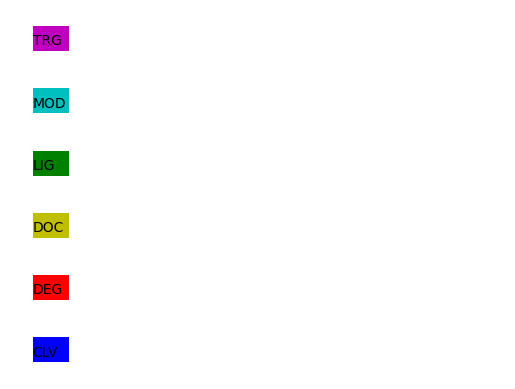

In [24]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
fig,ax = plt.subplots()
plt.axis('off')
ax.plot(5,0)
for k,elm_type in enumerate(color_dict):
    color = color_dict[elm_type]
    ax.add_patch(Rectangle((0,k),0.4,0.4,facecolor=color))
    ax.text(0,k+0.1,elm_type)

Filter amyloids with missing information

In [25]:
filtered_amylos_with_slims = {} # no O43236 ni Q5BIV9
for ID in amylos_with_slims:
    if ID != 'O43236' and ID != 'Q5BIV9':
        filtered_amylos_with_slims[ID] = amylos_with_slims[ID]

Load disorder information

In [26]:
import json
with open("../raw/p53_mobidb.json", "r") as f:
    p53_mobidb_data = json.load(f)
p53_mobidb_data["curated-disorder-merge"]

{'regions': [[1, 96], [288, 312], [361, 393]],
 'content_fraction': 0.392,
 'content_count': 154,
 'regions_ids': [],
 'regions_names': [],
 'regions_params': []}

In [27]:
disorder_spans = {}
disorder_spans["P04637"] = p53_mobidb_data["curated-disorder-merge"]["regions"]
disorder_evidence = {}
disorder_evidence["P04637"] = "curated"

In [28]:
with open("../raw/app_mobidb.json", "r") as f:
    app_mobidb_data = json.load(f)

In [29]:
disorder_spans["P05067"] = app_mobidb_data["curated-disorder-merge"]["regions"]
disorder_evidence["P05067"] = "curated"

In [30]:
with open("../raw/tau_mobidb.json", "r") as f:
    tau_mobidb_data = json.load(f)
disorder_spans["P10636"] = tau_mobidb_data["prediction-disorder-mobidb_lite"]["regions"]
disorder_evidence["P10636"] = "predicted"

In [31]:
with open("../raw/tubulin_mobidb.json", "r") as f:
    tubulin_mobidb_data = json.load(f)
disorder_spans["Q71U36"] = tubulin_mobidb_data["prediction-disorder-mobidb_lite"]["regions"]
disorder_evidence["Q71U36"] = "predicted"

In [32]:
with open("../raw/vitronectin_mobidb.json", "r") as f:
    vitronectin_mobidb_data = json.load(f)
disorder_spans["P04004"] = vitronectin_mobidb_data["curated-disorder-merge"]["regions"]
disorder_evidence["P04004"] = "curated"

In [33]:
with open("../raw/androgen_rec_mobidb.json", "r") as f:
    androgen_rec_mobidb_data = json.load(f)
disorder_spans["P10275"] = androgen_rec_mobidb_data["curated-disorder-merge"]["regions"]
disorder_evidence["P10275"] = "curated"

In [34]:
with open("../raw/nucleosphosin_mobidb.json", "r") as f:
    nucleophosmin_mobidb_data = json.load(f)
disorder_spans["P06748"] = nucleophosmin_mobidb_data["curated-disorder-merge"]["regions"]
disorder_evidence["P06748"] = "curated"

In [35]:
with open("../raw/Acetylcoholinesterase_mobidb.json", "r") as f:
    ace_mobidb_data = json.load(f)
disorder_spans["P22303"] = ace_mobidb_data["prediction-disorder-priority"]["regions"]
disorder_evidence["P22303"] = "predicted"

In [36]:
with open("../raw/mpp_mobidb.json", "r") as f:
    mpp_mobidb_data = json.load(f)
disorder_spans["P04156"] = mpp_mobidb_data["curated-disorder-merge"]["regions"]
disorder_evidence["P04156"] = "curated"

In [37]:
with open("../raw/alpha_synuclein_mobidb.json", "r") as f:
    A_syn_mobidb_data = json.load(f)
disorder_spans["P37840"] = A_syn_mobidb_data["curated-disorder-merge"]["regions"]
disorder_evidence["P37840"] = "curated"

## Plotting the regions

Plot all proteins in the same graph with their amyloids(grey) and SLiMs(colored)

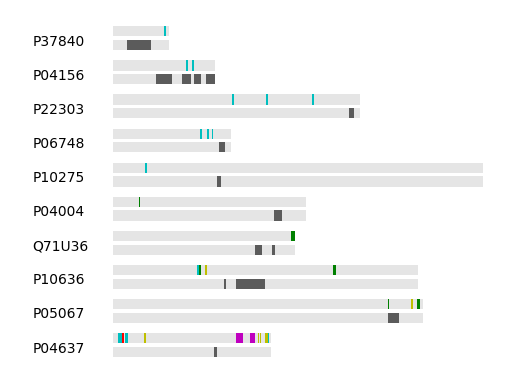

In [38]:
fig,ax = plt.subplots()
plt.axis('off')
width = 0.3
separation = 0.05
for k,amylo_ID in enumerate(filtered_amylos_with_slims):
    length = len_dict[amylo_ID]
    ax.plot(0,0,alpha = 0)
    ax.text(0,k+0.3,amylo_ID)
    ax.plot(length,k,alpha = 0)
    ax.add_patch(Rectangle((200,k+0.5-width-separation),length,width,facecolor=(0,0,0,0.1)))
    amylo_spans = amylo_spans_dict[amylo_ID]
    if type(amylo_spans) == str:
        amylo_spans = amylo_spans.split(',')
        new_amylo_spans = []
        for amylo_span in amylo_spans:
            amylo_span = amylo_span.split('-')
            new_amylo_spans.append((int(amylo_span[0]),int(amylo_span[1])))
        amylo_spans = new_amylo_spans
        if type(amylo_spans[0][0]) == int:
            amylo_spans = amylo_spans[0]
    for amylo_span in amylo_spans:
        ax.add_patch(Rectangle((200 + amylo_span[0],k+0.5-width-separation),amylo_span[1] - amylo_span[0],width,facecolor=(0,0,0,0.6)))
    
    ax.add_patch(Rectangle((200,k+0.5+separation),length,width,facecolor=(0,0,0,0.1)))
    elm_classes_in_amylo = amylos_with_slims[amylo_ID]
    for elm_class in elm_classes_in_amylo:
        instances_in_amylo = elm_classes_in_amylo[elm_class]
        for slim in instances_in_amylo: #un mismo amylo puede tener mas de una instancia del mismo slim en su secuencia
            slim_span = slim['span']
            ax.add_patch(Rectangle((200 + slim_span[0],k+0.5+separation),slim_span[1] - slim_span[0],width,facecolor=color_dict[elm_class[0:3]]))
            
plt.savefig('../results/test.png',dpi = 300)

Define a function to graph the regions in question, amyloids in grey, disorder in red and SLiMs in colors

In [105]:
def graph_regions(amylo_ID):
    fontsize = 100
    width = 0.05
    separation = 0.005
    
    length = len_dict[amylo_ID]
    start=length/4
    fig, (ax, ax1) = plt.subplots(ncols=2, figsize=(100,15), gridspec_kw={'width_ratios': [10, 1]})  # Adjust width ratios
    
    ax.plot(0, 0, alpha=0)
    ax.plot(length, 0, alpha=0)
    
    # Add main sequence rectangle
    ax.add_patch(Rectangle((start, -width-separation), length, width, facecolor=(0,0,0,0.1)))
    
    # Process amylo spans
    
    amylo_spans = amylo_spans_dict[amylo_ID]
    if type(amylo_spans) == str:
        amylo_spans = amylo_spans.split(',')
        new_amylo_spans = []
        for amylo_span in amylo_spans:
            amylo_span = amylo_span.split('-')
            new_amylo_spans.append((int(amylo_span[0]), int(amylo_span[1])))
        amylo_spans = new_amylo_spans
        if type(amylo_spans[0][0]) == int:
            amylo_spans = amylo_spans[0]
    
    # Add amylo span rectangles
    ax.text(0,  - width/2 - separation, "Regiones amiloides", fontsize=fontsize)
    for amylo_span in amylo_spans:
        ax.add_patch(Rectangle((start + amylo_span[0], -width-separation), 
                               amylo_span[1] - amylo_span[0], width, facecolor=(0,0,0,0.6)))
    
    # Add ELM class rectangles
    ax.text(0, width/2 + separation, "SLiMs", fontsize=fontsize)
    ax.add_patch(Rectangle((start, +separation), length, width, facecolor=(0,0,0,0.1)))
    
    elm_classes_in_amylo = amylos_with_slims[amylo_ID]
    for elm_class in elm_classes_in_amylo:
        instances_in_amylo = elm_classes_in_amylo[elm_class]
        for slim in instances_in_amylo:
            slim_span = slim['span']
            ax.add_patch(Rectangle((start + slim_span[0], +separation), 
                                   slim_span[1] - slim_span[0], width, 
                                   facecolor=color_dict[elm_class[0:3]]))

    ax.add_patch(Rectangle((start, -2*width - 3*separation), length, width, facecolor=(0,0,0,0.1)))
    evidence = disorder_evidence[amylo_ID]
    if evidence == "curated":
        facecolor = (0.8,0,0,0.6)
    elif evidence == "predicted":
        facecolor = (0.8,0,0,0.4)
    ax.text(0, - width - width/2 - 3*separation, "Desorden", fontsize=fontsize)
    disordered_regions = disorder_spans[amylo_ID]
    for region in disordered_regions:
        ax.add_patch(Rectangle((start + region[0], -2*width-3*separation), 
                               region[1] - region[0], width, facecolor=facecolor))
    
    # Add color legend to ax1
    ax1.set_xlim(0, 1)
    ax1.set_ylim(0, len(color_dict))
    ax1.axis('off')  # Turn off axis lines and ticks
    
    for k, elm_type in enumerate(color_dict):
        color = color_dict[elm_type]
        ax1.add_patch(Rectangle((0.1, k), 0.3, 0.5, facecolor=color))
        ax1.text(0.5, k+0.25, elm_type, fontsize=fontsize, verticalalignment='center')
    fig.suptitle(f"Regiones de {amylo_ID}",
                fontsize=2*fontsize,  # Adjust font size
                fontweight='bold'
                )
    plt.tight_layout()  # Adjust layout to prevent overlap

### Graphing each protein

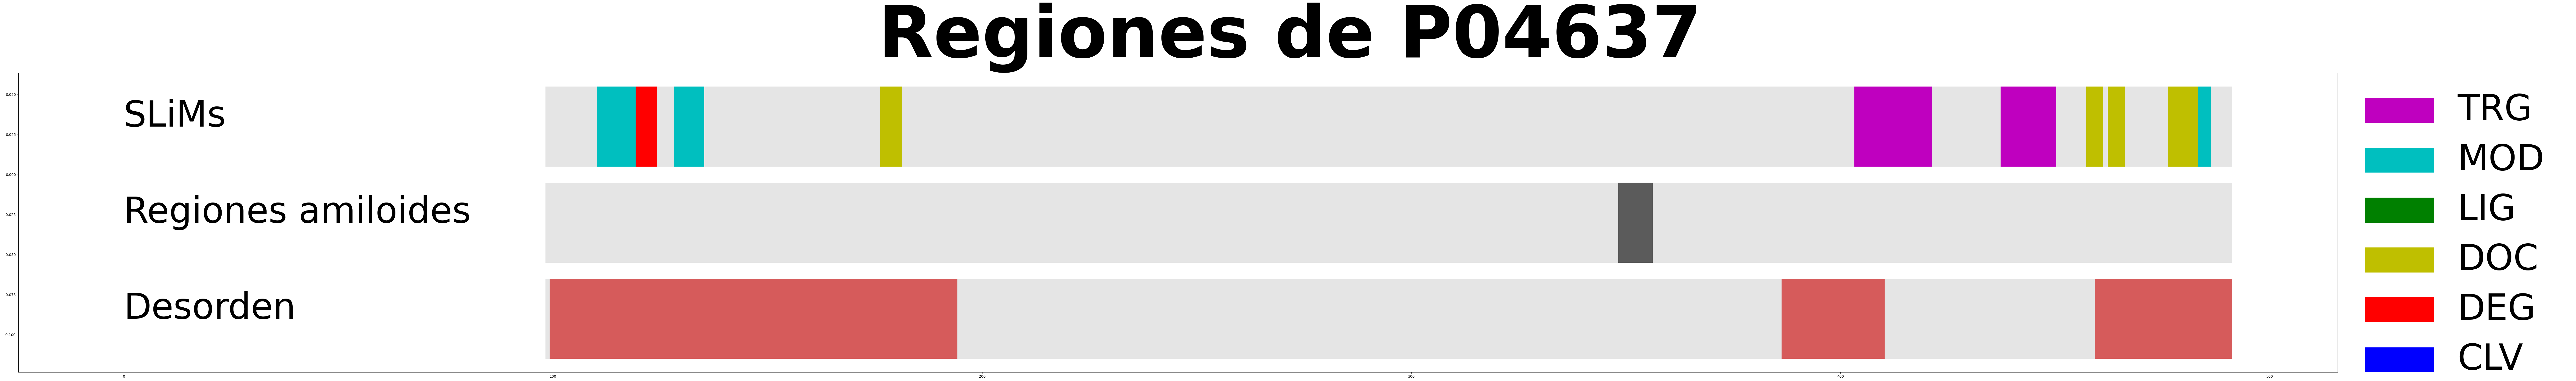

In [106]:
graph_regions("P04637")

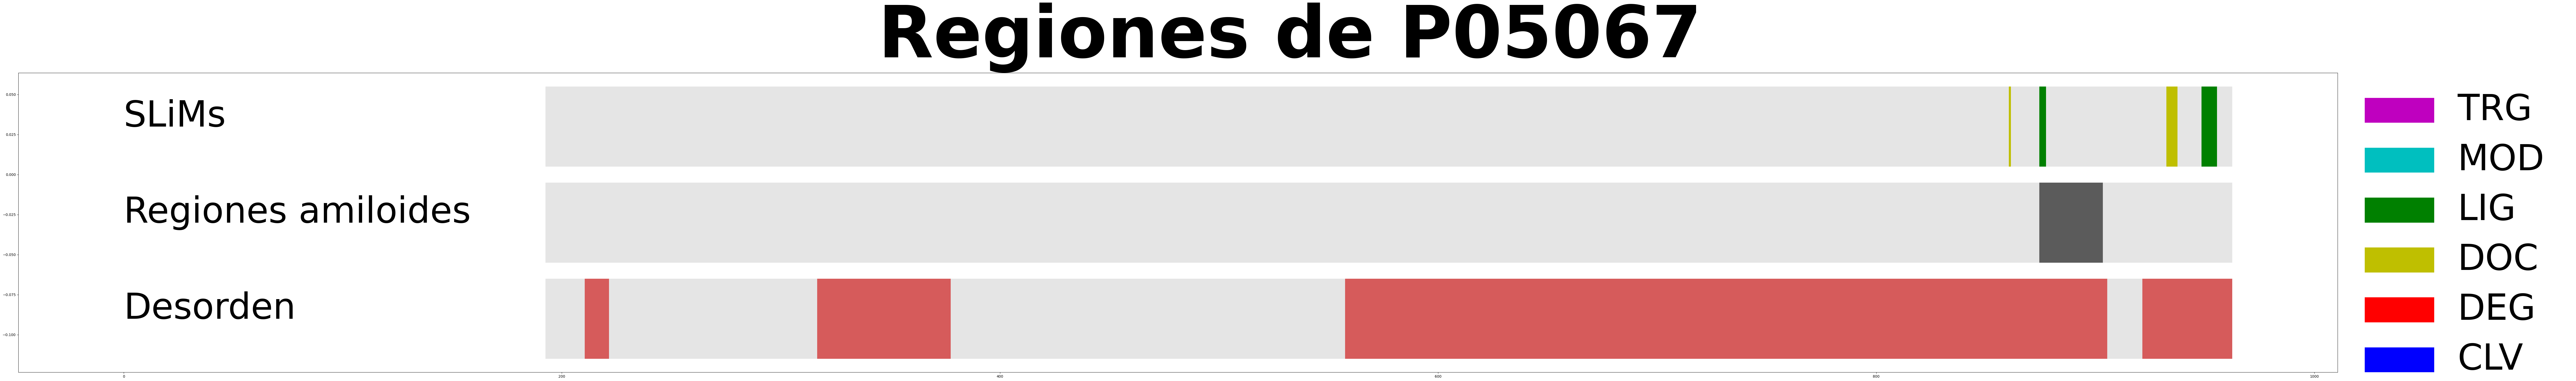

In [107]:
graph_regions("P05067")

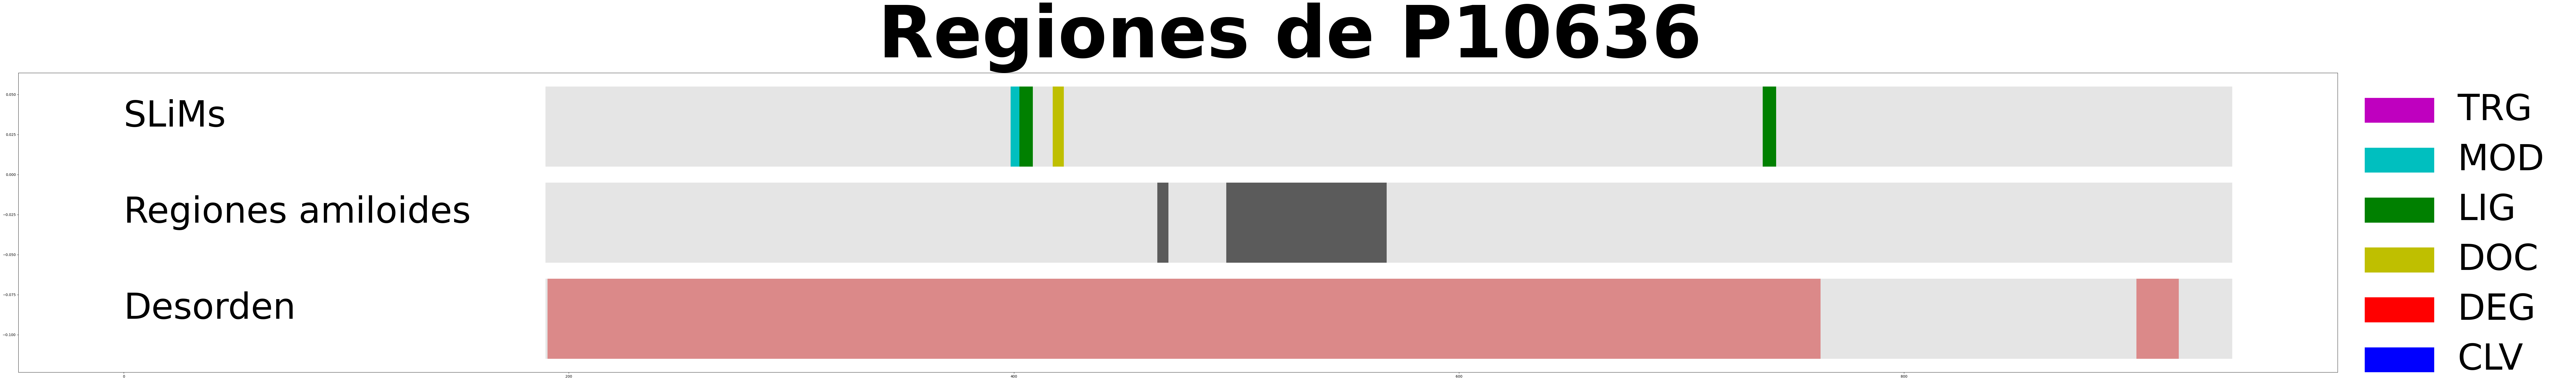

In [108]:
graph_regions("P10636")

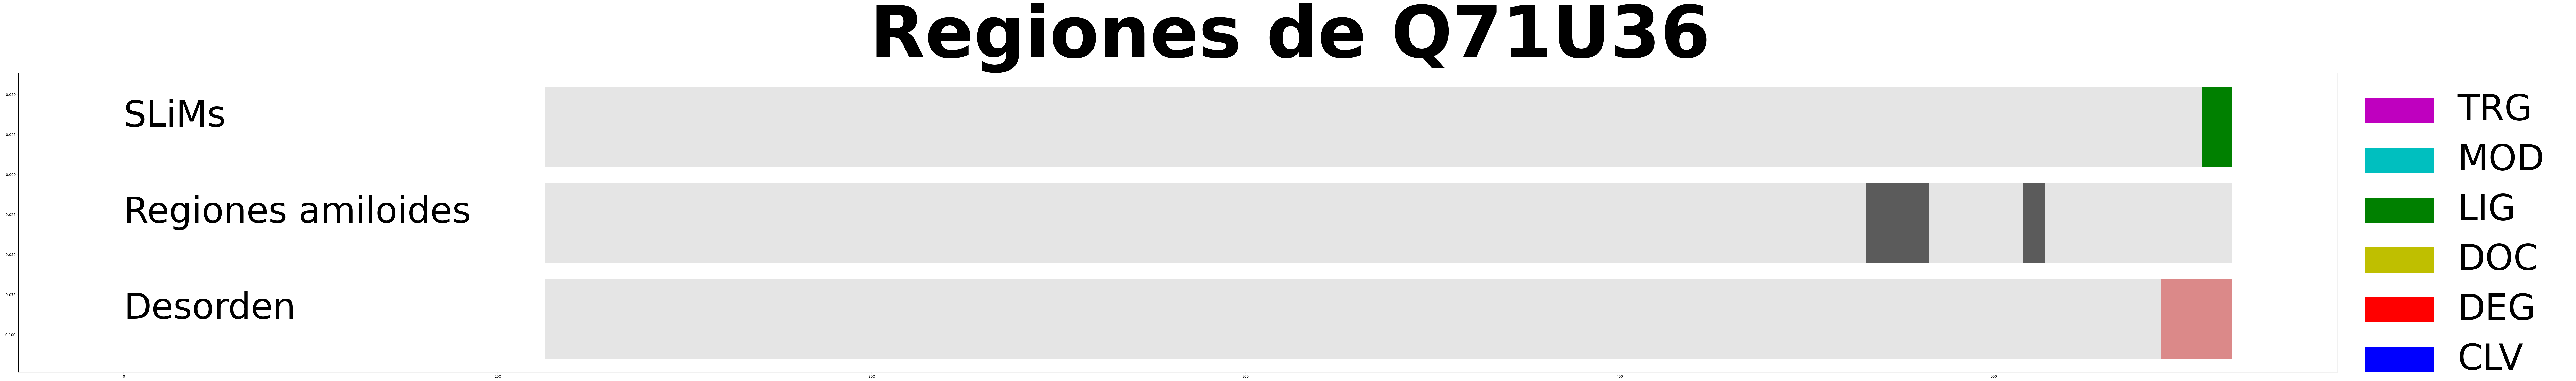

In [109]:
graph_regions("Q71U36")

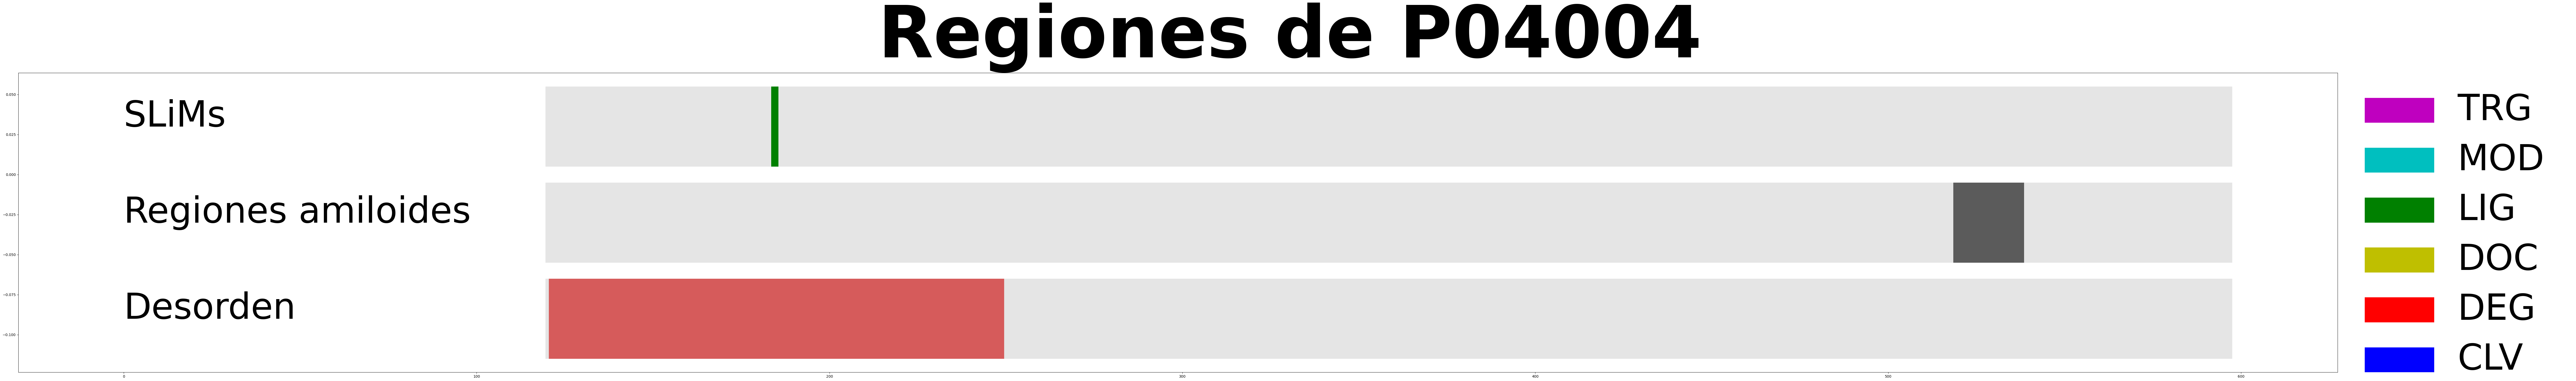

In [110]:
graph_regions("P04004")

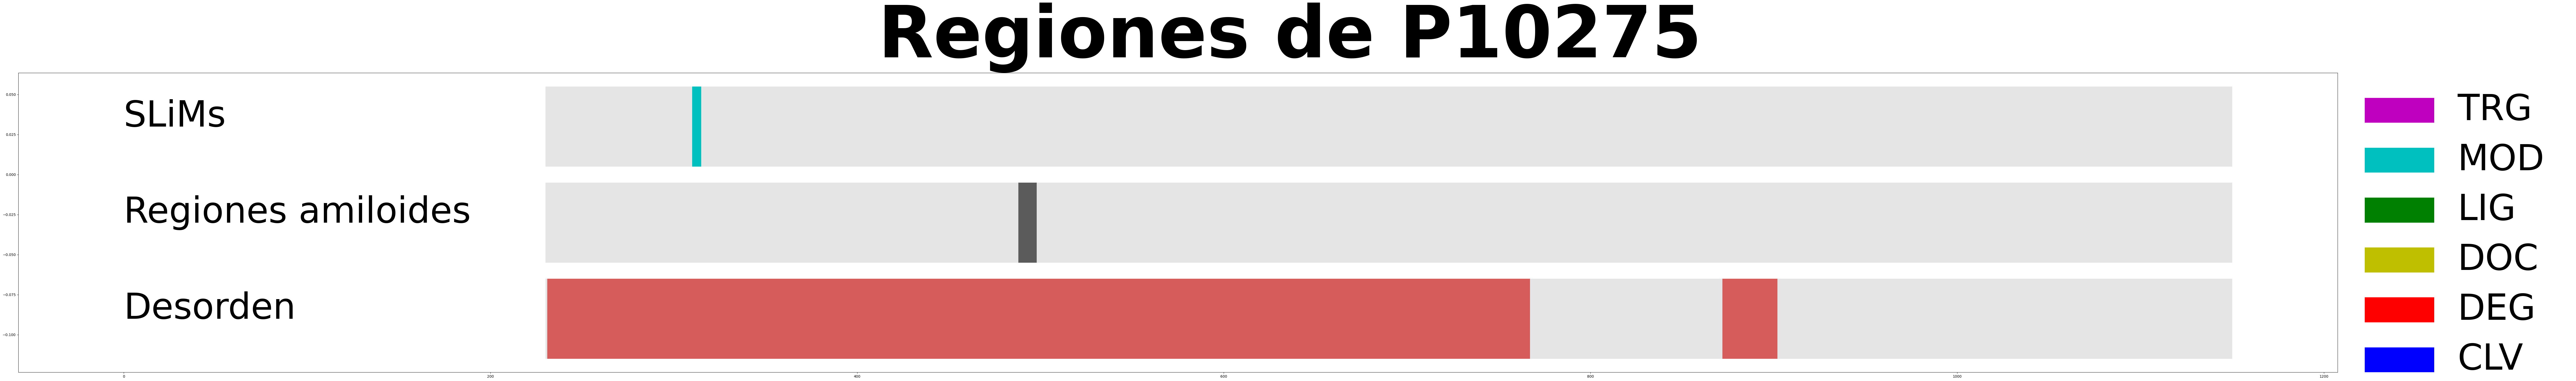

In [111]:
graph_regions("P10275")

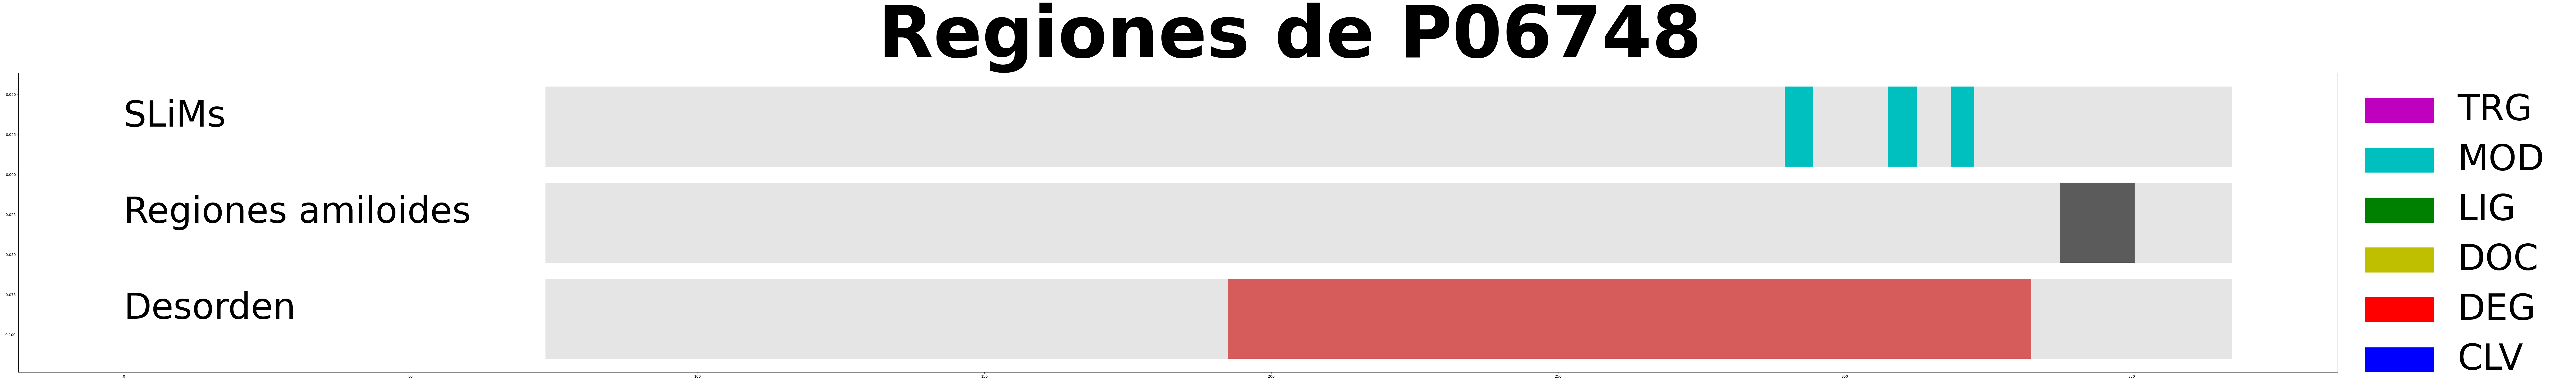

In [112]:
graph_regions("P06748")

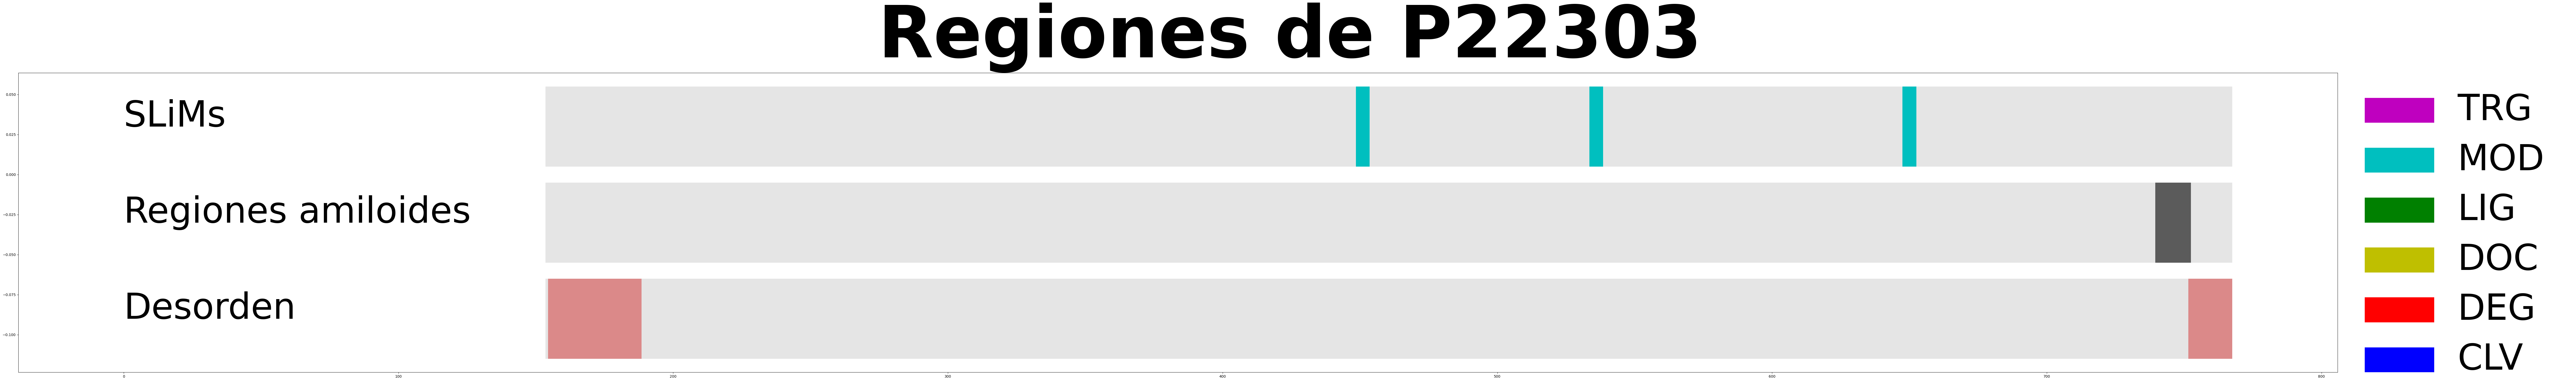

In [113]:
graph_regions("P22303")

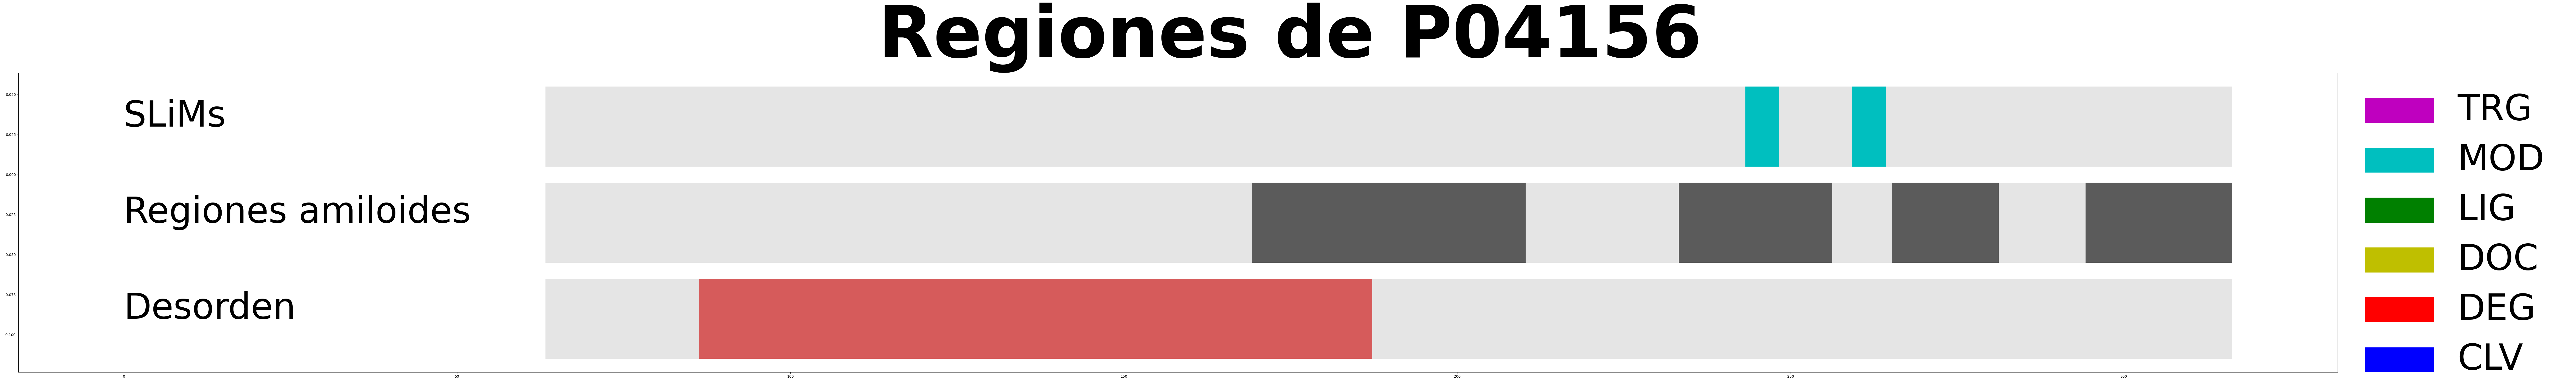

In [114]:
graph_regions("P04156")

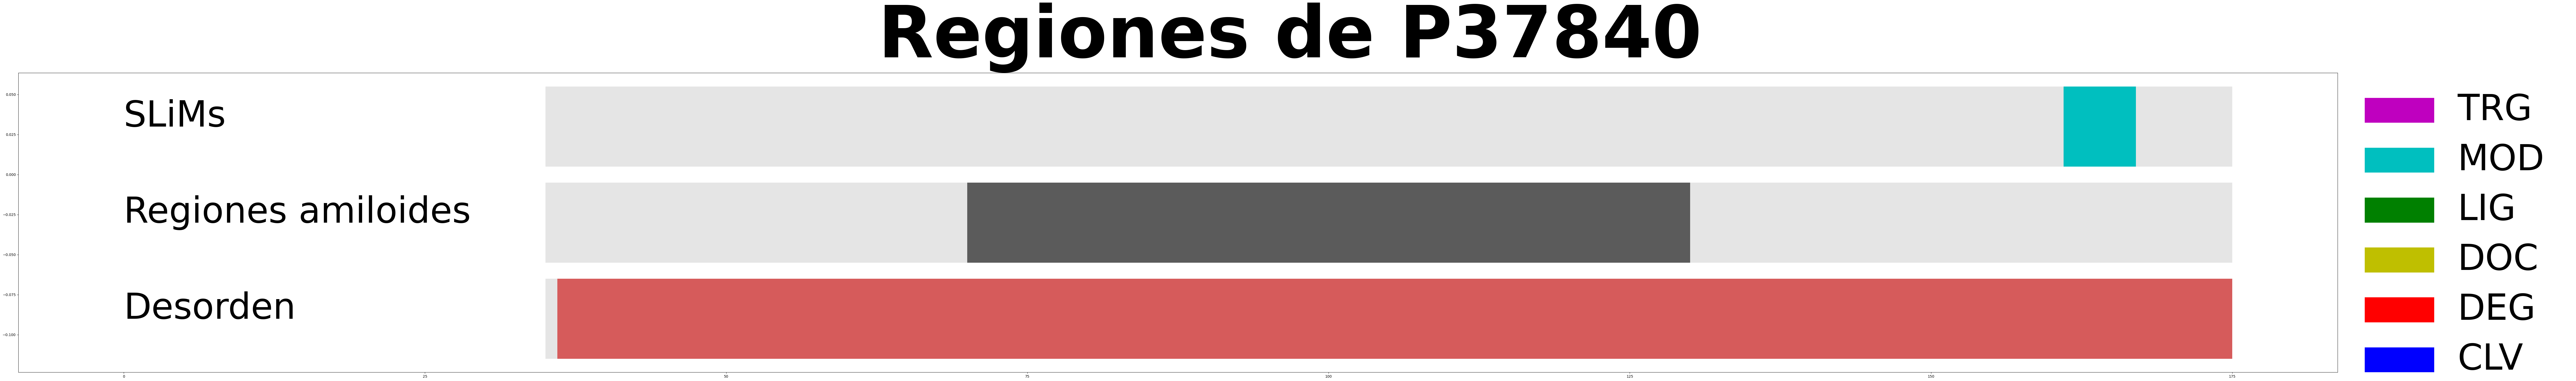

In [115]:
graph_regions("P37840")

## Distance and coverage analysis

### Coverage analysis
for all pairs of regions (amylo-SLiMs, amylo-disorder, disorder-SLiMs) we calculate the coverage of one by the other

Useful data structures and functions

In [50]:
slim_spans = {
    amylo_id: sum([
        [instance_data["span"] for instance_data in instances]
    for elm_class, instances in classes.items()
    ], [])
    for amylo_id, classes in amylos_with_slims.items()
}

In [51]:
def spans_to_set(spans):
    """Convert spans to a set of covered positions."""
    return set(pos for start, end in spans for pos in range(start, end + 1))

def percentage_overlap(region1, region2):
    """
    Calculate the percentage of region1 that overlaps with region2.

    Args:
        region1 (list of tuples): Spans [(start, end)] for the first region.
        region2 (list of tuples): Spans [(start, end)] for the second region.

    Returns:
        float: Percentage of region1 covered by region2 (0-1 range).
    """
    set1 = spans_to_set(region1)
    set2 = spans_to_set(region2)
    
    if not set1:  # Avoid division by zero for empty region1
        return 0.0
    
    overlap = set1 & set2
    return 100 * len(overlap) / len(set1)

In [52]:
def analyze_region_cooccurrence(proteins, metric=percentage_overlap):
    # Initialize results dictionary
    results = {
        'slims_amyloid_overlap': [],
        'slims_disordered_overlap': [],
        'amyloid_disordered_overlap': []
    }
    
    for protein in proteins:
        # Compute overlaps
        slims_amyloid_overlap = metric(
            slim_spans[protein], 
            amylo_spans_dict[protein]
        )
        slims_disordered_overlap = metric(
            slim_spans[protein], 
            disorder_spans[protein]
        )
        amyloid_disordered_overlap = metric(
            amylo_spans_dict[protein],
            disorder_spans[protein]
        )
        
        # Store results
        results['slims_amyloid_overlap'].append(slims_amyloid_overlap)
        results['slims_disordered_overlap'].append(slims_disordered_overlap)
        results['amyloid_disordered_overlap'].append(amyloid_disordered_overlap)
    
    return results



Printing the regions for ease of analysis

In [53]:
amylo_spans_dict

{'P04637': [(250, 258)],
 'P05067': [(682, 711)],
 'P10636': [(275, 280), (306, 378)],
 'Q71U36': [(353, 370), (395, 401)],
 'P04004': [(399, 419)],
 'P10275': [(258, 268)],
 'P06748': [(264, 277)],
 'O43236': [],
 'P22303': [(586, 599)],
 'P04156': [(106, 147), (170, 193), (202, 218), (231, 253)],
 'P37840': [(35, 95)],
 'Q5BIV9': []}

In [54]:
slim_spans

{'P04637': [(19, 26),
  (378, 388),
  (359, 363),
  (364, 368),
  (30, 35),
  (78, 83),
  (312, 317),
  (312, 319),
  (15, 21),
  (30, 37),
  (12, 18),
  (385, 388),
  (339, 352),
  (305, 323)],
 'P05067': [(668, 669), (740, 745), (756, 763), (682, 685), (757, 760)],
 'P10636': [(228, 233), (547, 553), (213, 219), (209, 213)],
 'Q71U36': [(443, 451)],
 'P04004': [(64, 66)],
 'P10275': [(80, 85)],
 'P06748': [(216, 221), (234, 239), (245, 249)],
 'O43236': [(104, 108)],
 'P22303': [(295, 300), (380, 385), (494, 499)],
 'P04156': [(180, 185), (196, 201)],
 'P37840': [(126, 132)],
 'Q5BIV9': [(26, 30)]}

In [55]:
disorder_spans

{'P04637': [[1, 96], [288, 312], [361, 393]],
 'P05067': [[18, 29], [124, 185], [365, 713], [729, 770]],
 'P10636': [[1, 573], [715, 734]],
 'Q71U36': [[432, 451]],
 'P04004': [[1, 130]],
 'P10275': [[1, 537], [642, 672]],
 'P06748': [[119, 259]],
 'P22303': [[1, 35], [598, 614]],
 'P04156': [[23, 124]],
 'P37840': [[1, 140]]}

In [56]:
proteins = [
    'P04637',
    'P05067',
    'P10636',
    'Q71U36',
    'P04004',
    'P10275',
    'P06748',
    'P22303',
    'P04156',
    'P37840'
]

In [57]:
coocurrence = analyze_region_cooccurrence(proteins)

Computing overlaps

In [58]:
slims_amyloid_overlap = coocurrence["slims_amyloid_overlap"]
slims_disorder_overlap = coocurrence["slims_disordered_overlap"]
amyloid_disorder_overlap = coocurrence["amyloid_disordered_overlap"]

Printing overlaps (per protein)

In [59]:
amyloid_disorder_overlap

[0.0,
 100.0,
 100.0,
 0.0,
 0.0,
 100.0,
 0.0,
 14.285714285714286,
 17.92452830188679,
 100.0]

In [60]:
slims_amyloid_overlap

[0.0, 20.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 50.0, 0.0]

In [61]:
slims_disorder_overlap

[67.46987951807229, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 0.0, 0.0, 100.0]

In [62]:
spans_to_set([(2,5), (8, 10)])

{2, 3, 4, 5, 8, 9, 10}

Printing certain examples to check spans and overlaps

In [63]:
import pprint
pp = pprint.PrettyPrinter(indent=4)
pp.pprint(amylos_with_slims['P04637'])

{   'DEG_MDM2_SWIB_1': [   {   'ELM_Accession': 'ELMI002838',
                               'References': '25591003 17284038 8875929',
                               'span': (19, 26)}],
    'DOC_CYCLIN_RxL_1': [   {   'ELM_Accession': 'ELMI000051',
                                'References': '12501191 10884347',
                                'span': (378, 388)}],
    'DOC_USP7_MATH_1': [   {   'ELM_Accession': 'ELMI001067',
                               'References': '16474402 16402859',
                               'span': (359, 363)},
                           {   'ELM_Accession': 'ELMI001068',
                               'References': '16474402',
                               'span': (364, 368)}],
    'DOC_WW_Pin1_4': [   {   'ELM_Accession': 'ELMI001957',
                             'References': '12388558',
                             'span': (30, 35)},
                         {   'ELM_Accession': 'ELMI001995',
                             'References': '12397362',

In [64]:
len(slim_spans['P04637'])

14

In [65]:
pp.pprint(amylos_with_slims['P05067'])

{   'DOC_WW_Pin1_4': [   {   'ELM_Accession': 'ELMI002308',
                             'References': '16139797',
                             'span': (668, 669)},
                         {   'ELM_Accession': 'ELMI002136',
                             'References': '19602287',
                             'span': (740, 745)}],
    'LIG_PTB_Apo_2': [   {   'ELM_Accession': 'ELMI001555',
                             'References': '8887653 10373567 18833287 9321393',
                             'span': (756, 763)}],
    'LIG_SH2_GRB2like': [   {   'ELM_Accession': 'ELMI003686',
                                'References': '22001015',
                                'span': (682, 685)},
                            {   'ELM_Accession': 'ELMI002125',
                                'References': '19602287',
                                'span': (757, 760)}]}


In [66]:
pp.pprint(amylos_with_slims['P10636'])

{   'DOC_WW_Pin1_4': [   {   'ELM_Accession': 'ELMI002304',
                             'References': '10391244',
                             'span': (228, 233)}],
    'LIG_SH3_1': [   {   'ELM_Accession': 'ELMI000175',
                         'References': '9763511',
                         'span': (547, 553)}],
    'LIG_SH3_3': [   {   'ELM_Accession': 'ELMI002590',
                         'References': '18467332',
                         'span': (213, 219)}],
    'MOD_DYRK1A_RPxSP_1': [   {   'ELM_Accession': 'ELMI003666',
                                  'References': '16242644 17135279 16987243 '
                                                '11311121',
                                  'span': (209, 213)}]}


In [67]:
pp.pprint(amylos_with_slims['Q71U36'])

{   'LIG_CAP-Gly_1': [   {   'ELM_Accession': 'ELMI001057',
                             'References': '16954346 17563362',
                             'span': (443, 451)}]}


In [68]:
pp.pprint(amylos_with_slims['P04004'])

{   'LIG_Integrin_RGD_1': [   {   'ELM_Accession': 'ELMI000115',
                                  'References': '2447074',
                                  'span': (64, 66)}]}


In [69]:
pp.pprint(amylos_with_slims['P10275'])

{   'MOD_CDK_SPK_2': [   {   'ELM_Accession': 'ELMI003233',
                             'References': '17043241',
                             'span': (80, 85)}]}


In [70]:
pp.pprint(amylos_with_slims['P06748'])

{   'MOD_CDK_SPK_2': [   {   'ELM_Accession': 'ELMI003238',
                             'References': '12058066',
                             'span': (216, 221)},
                         {   'ELM_Accession': 'ELMI003239',
                             'References': '12058066',
                             'span': (234, 239)}],
    'MOD_SUMO_rev_2': [   {   'ELM_Accession': 'ELMI002882',
                              'References': '24782567 25114211 25218447',
                              'span': (245, 249)}]}


In [71]:
pp.pprint(amylos_with_slims['P22303'])

{   'MOD_N-GLC_1': [   {   'ELM_Accession': 'ELMI000579',
                           'References': '8280063',
                           'span': (295, 300)},
                       {   'ELM_Accession': 'ELMI000580',
                           'References': '8280063',
                           'span': (380, 385)},
                       {   'ELM_Accession': 'ELMI000581',
                           'References': '8280063',
                           'span': (494, 499)}]}


In [72]:
pp.pprint(amylos_with_slims['P04156'])

{   'MOD_N-GLC_1': [   {   'ELM_Accession': 'ELMI000599',
                           'References': '12356908',
                           'span': (180, 185)},
                       {   'ELM_Accession': 'ELMI000600',
                           'References': '12356908',
                           'span': (196, 201)}]}


In [73]:
pp.pprint(amylos_with_slims['P37840'])

{   'MOD_Plk_2-3': [   {   'ELM_Accession': 'ELMI003378',
                           'References': '19004816',
                           'span': (126, 132)}]}


### Printing coverage results

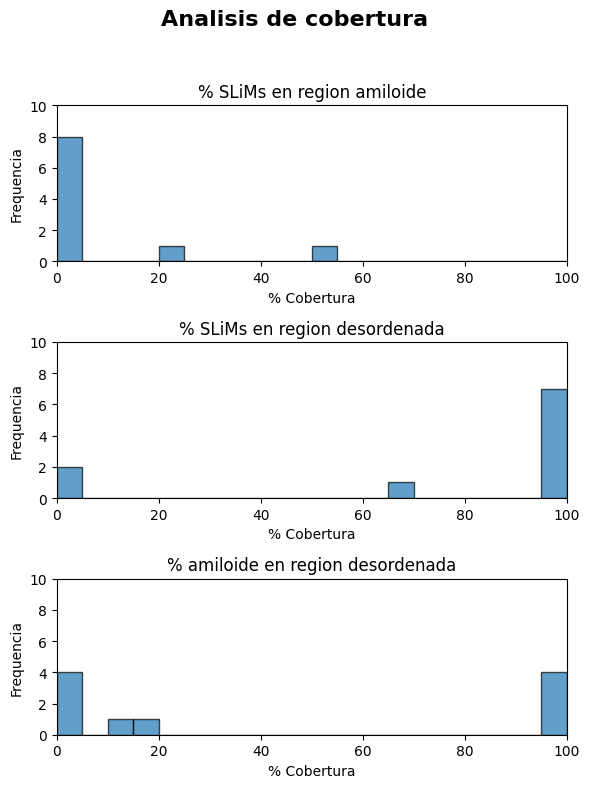

In [116]:
import numpy as np
fig, axes = plt.subplots(nrows=3, figsize=(6, 8))

# Define consistent bins for the range 0-100
bins = np.linspace(0, 100, 21)  # 10 bins between 0 and 100
data = [slims_amyloid_overlap, slims_disorder_overlap, amyloid_disorder_overlap]
# Plot histograms
for i, (ax, d) in enumerate(zip(axes, data)):
    ax.hist(d, bins=bins, alpha=0.7, edgecolor='black')  # Use consistent bins
    ax.set_xlabel("% Cobertura")
    ax.set_ylabel("Frequencia")
    ax.set_xlim(0, 100)  # Fix x-axis range
    ax.set_ylim(0, 10)   # Adjust y-axis range as needed

axes[0].set_title("% SLiMs en region amiloide")
axes[1].set_title("% SLiMs en region desordenada")
axes[2].set_title("% amiloide en region desordenada")

# Add a global title
fig.suptitle("Analisis de cobertura", fontsize=16, fontweight = "bold")

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to fit the global title
plt.show()


## Distance analysis

Useful functions

In [75]:
def calculate_proximity(slims, amyloids, length):
    """
    Compute distances of SLiMs to the nearest amyloid region.
    
    Args:
        slms: List of tuples [(start, end)] for SLiMs.
        amyloids: List of tuples [(start, end)] for amyloid regions.
    
    Returns:
        distances: List of distances (0 if inside, >0 if outside).
    """
    distances = []
    for slm_start, slm_end in slims:
        min_distance = float('inf')  # Initialize with a large number
        for amy_start, amy_end in amyloids:
            # Case 1: SLiM is inside or overlapping with amyloid
            if slm_end >= amy_start and slm_start <= amy_end:
                min_distance = 0
                break
            # Case 2: Compute nearest boundary distance
            distance = min (
                abs(slm_start - amy_start),
                abs(slm_start - amy_end),
                abs(slm_end - amy_start),
                abs(slm_end - amy_end)
            )
            min_distance = min(min_distance, distance)
        distances.append(100 * min_distance/length)
    return distances


Trying function with examples

In [76]:
calculate_proximity(slim_spans["P04637"], amylo_spans_dict["P04637"], len_dict["P04637"])

[56.99745547073791,
 30.53435114503817,
 25.699745547073793,
 26.97201017811705,
 54.70737913486005,
 42.49363867684478,
 13.740458015267176,
 13.740458015267176,
 58.26972010178117,
 54.19847328244275,
 59.033078880407125,
 32.31552162849873,
 20.610687022900763,
 11.959287531806616]

In [77]:
calculate_proximity(slim_spans["P05067"], amylo_spans_dict["P05067"], len_dict["P05067"])

[1.6883116883116882,
 3.7662337662337664,
 5.8441558441558445,
 0.0,
 5.974025974025974]

In [78]:
protein = "P10636"
calculate_proximity(slim_spans[protein], amylo_spans_dict[protein], len_dict[protein])

[5.54089709762533, 22.29551451187335, 7.387862796833773, 8.179419525065963]

Calculate all distances from SLiMs to their closest amyloid region for all proteins

In [79]:
proximities_dict = {}
proximities = []
for protein in proteins:
    results = calculate_proximity(slim_spans[protein], amylo_spans_dict[protein], len_dict[protein])
    proximities_dict[protein] = results
    proximities += results

proximities = np.array(proximities)

In [80]:
pp.pprint(proximities)

array([56.99745547, 30.53435115, 25.69974555, 26.97201018, 54.70737913,
       42.49363868, 13.74045802, 13.74045802, 58.2697201 , 54.19847328,
       59.03307888, 32.31552163, 20.61068702, 11.95928753,  1.68831169,
        3.76623377,  5.84415584,  0.        ,  5.97402597,  5.5408971 ,
       22.29551451,  7.3878628 ,  8.17941953,  9.31263858, 69.66527197,
       18.80434783, 14.62585034,  8.50340136,  5.10204082, 46.57980456,
       32.73615635, 14.16938111,  0.        ,  0.39525692, 22.14285714])


### Plotting the distance histogram

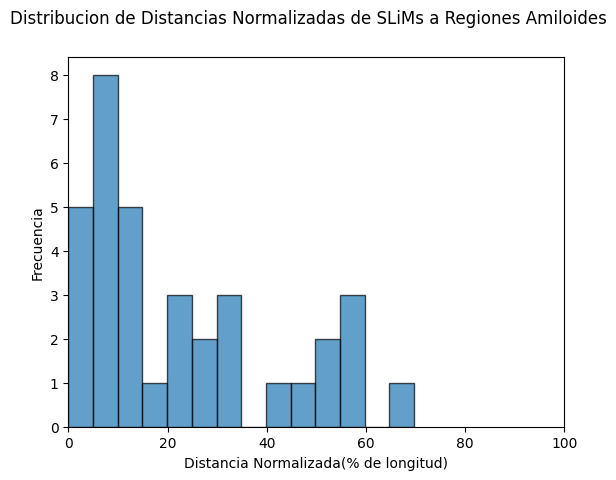

In [81]:
fig, ax = plt.subplots()
ax.hist(proximities, bins=14, alpha=0.7, edgecolor='black')
fig.suptitle("Distribucion de Distancias Normalizadas de SLiMs a Regiones Amiloides")
ax.set_xlim(0, 100)
ax.set_xlabel("Distancia Normalizada(% de longitud)")
ax.set_ylabel("Frecuencia")
plt.show()


defining some utilities

In [82]:
# should have done this before
class Protein:
    def __init__(self, name, length, amyloid_regions, slims, disordered_regions):
        self.name = name
        self.length = length
        self.amyloid_regions = amyloid_regions
        self.slims = slims
        self.disordered_regions = disordered_regions
        

In [83]:
protein_objects = []
for protein in proteins:
    name = protein
    length = len_dict[protein]
    amyloid_regions = amylo_spans_dict[protein]
    disordered_regions = disorder_spans[protein]
    slims = slim_spans[protein]
    protein_objects.append(Protein(name, length, amyloid_regions, slims, disordered_regions))

## Statistical analysis
To check the statistical relevance of the observed distribution, we make a simulation based on the assumption of uniform distribution of slims, meaning their position is independent of the position of the amyloid, to use as a null hypothesis.
The simulation is performed by changing the SLiMs position on the proteins (initial aminoacid of the slim, keeping its length) with random numbers from a uniform distribution, we keep the amyloids where they were.
We then compare the results of the simulations with the real data.

We create a histogram as the average of the 10000 simulated distributions and show the standard deviation for each bin compared with the real distribution. 

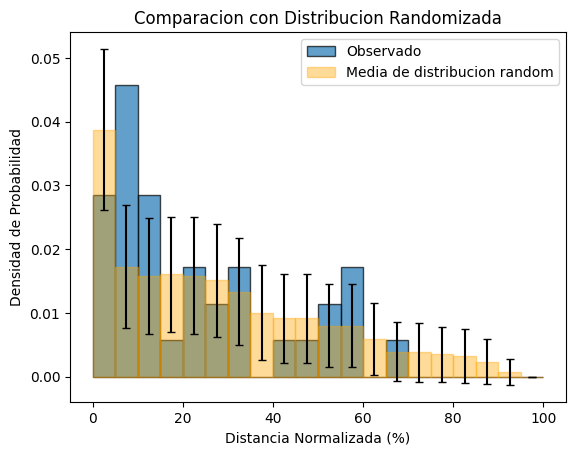

In [120]:
import random


# Observed distances
observed_distances = proximities

# Randomization
n_iterations = 10000
randomized_distances = []

for _ in range(n_iterations):
    iteration_distances = []
    for protein in protein_objects:
        randomized_slims = []
        # Shuffle SLiMs
        slim_lengths = [slim[1] - slim[0] for slim in protein.slims]
        for length in slim_lengths:
            start = random.randint(0, protein.length - length)
            randomized_slims.append((start, start + length))
        # Compute distances
        iteration_distances.extend(calculate_proximity(randomized_slims, protein.amyloid_regions, protein.length))
    randomized_distances.append(iteration_distances)



# Convert randomized distances into histograms
bins = np.linspace(0, 100, 21)
observed_hist, _ = np.histogram(observed_distances, bins=bins, density=True)
randomized_hists = [np.histogram(r, bins=bins, density=True)[0] for r in randomized_distances]

# Calculate mean and standard deviation of randomized histograms
random_mean = np.mean(randomized_hists, axis=0)
random_std = np.std(randomized_hists, axis=0)

# Plot observed vs randomized histograms
# plt.bar(bins[:-1], observed_hist, width=5, alpha=0.7, label="Observado", edgecolor="black")
bin_widths = np.diff(bins)
plt.bar(bins[:-1], observed_hist, width=bin_widths, align='edge', alpha=0.7, label="Observado", edgecolor="black")

bars = plt.bar(
    bins[:-1],
    random_mean,
    width=bin_widths,
    align='edge',
    alpha=0.4,
    color="orange",
    label="Media de distribucion random",
    edgecolor = "orange",
    yerr=random_std,  # Add error bars
    capsize=3         # Add caps to the error bars
)
plt.title("Comparacion con Distribucion Randomizada")
plt.xlabel("Distancia Normalizada (%)")
plt.ylabel("Densidad de Probabilidad")
plt.legend()
plt.show()


In [85]:
# Convert randomized histograms into a NumPy array for easier manipulation
randomized_hists_array = np.array(randomized_hists)

# Calculate mean and std for the randomized histograms
random_mean = np.mean(randomized_hists_array, axis=0)
# Calculate two-sided p-values
p_values = []
for i, obs in enumerate(observed_hist):
    # Observed absolute deviation from random mean
    observed_deviation = abs(obs - random_mean[i])

    # Absolute deviations in the randomized data
    random_deviations = abs(randomized_hists_array[:, i] - random_mean[i])

    # Proportion of random deviations as extreme or more extreme than observed
    p_value = np.sum(random_deviations >= observed_deviation) / n_iterations
    p_values.append(p_value)

# Display p-values for each bin
for i, p in enumerate(p_values):
    print(f"Bin {bins[i]}-{bins[i+1]}%: p-value = {p:.4f}")


Bin 0.0-5.0%: p-value = 0.4962
Bin 5.0-10.0%: p-value = 0.0104
Bin 10.0-15.0%: p-value = 0.1970
Bin 15.0-20.0%: p-value = 0.3551
Bin 20.0-25.0%: p-value = 1.0000
Bin 25.0-30.0%: p-value = 0.7715
Bin 30.0-35.0%: p-value = 0.7235
Bin 35.0-40.0%: p-value = 0.2650
Bin 40.0-45.0%: p-value = 0.7349
Bin 45.0-50.0%: p-value = 0.7360
Bin 50.0-55.0%: p-value = 0.6510
Bin 55.0-60.0%: p-value = 0.1577
Bin 60.0-65.0%: p-value = 0.6227
Bin 65.0-70.0%: p-value = 1.0000
Bin 70.0-75.0%: p-value = 0.6517
Bin 75.0-80.0%: p-value = 0.6551
Bin 80.0-85.0%: p-value = 0.6620
Bin 85.0-90.0%: p-value = 1.0000
Bin 90.0-95.0%: p-value = 1.0000
Bin 95.0-100.0%: p-value = 1.0000


To check statistical significance of each comparison we calculate a p-value for each bin of the histogram.

Text(0, 0.5, 'P_value')

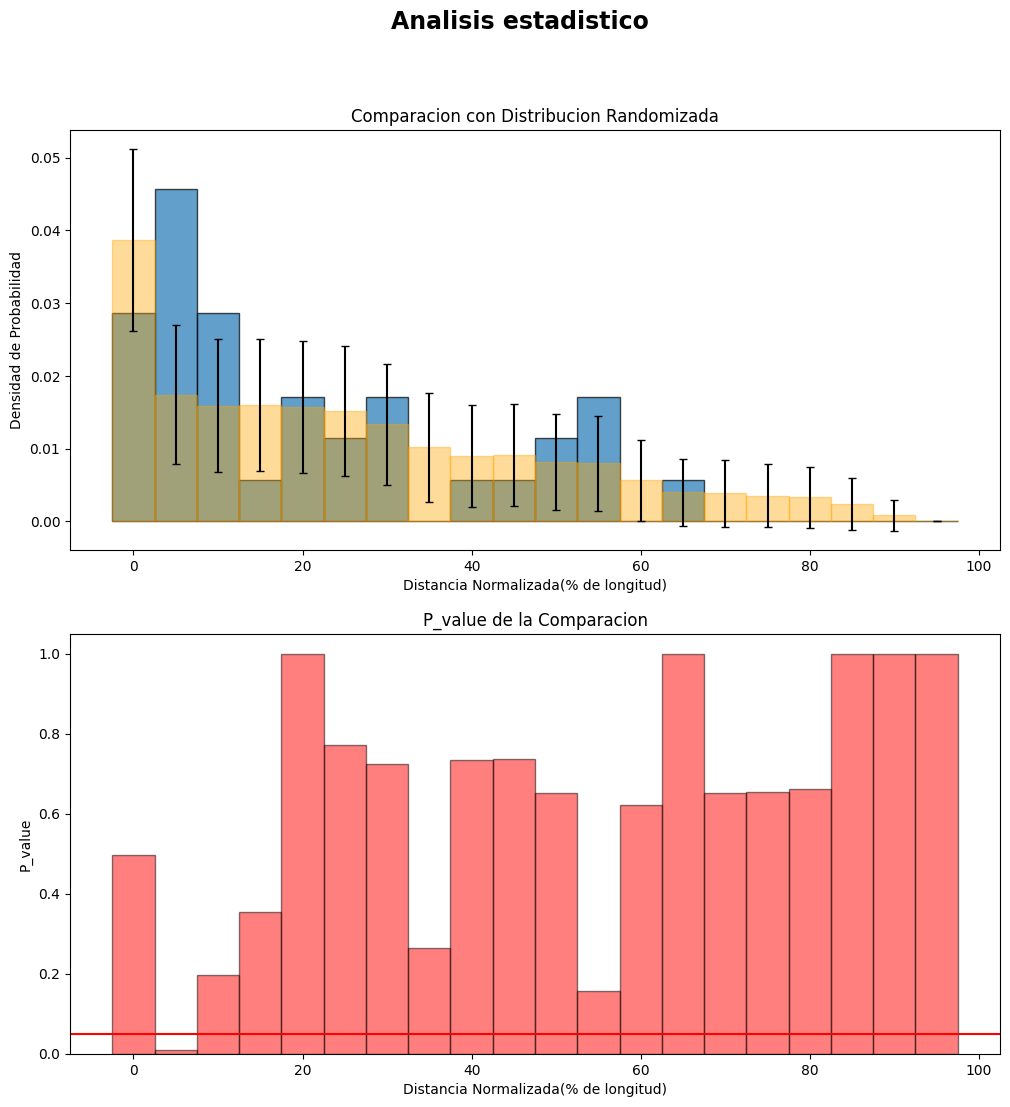

In [86]:
fig, (ax, ax1) = plt.subplots(figsize = (12, 12), nrows = 2)

ax.bar(bins[:-1], observed_hist, width=5, alpha=0.7, label="Observed", edgecolor="black")
bars = ax.bar(
    bins[:-1],
    random_mean,
    width=5,
    alpha=0.4,
    color="orange",
    label="Random Mean",
    edgecolor = "orange",
    yerr=random_std,  # Add error bars
    capsize=3         # Add caps to the error bars
)
fig.suptitle("Analisis estadistico", fontsize = 17, fontweight = "bold")

ax.set_title("Comparacion con Distribucion Randomizada")
ax.set_xlabel("Distancia Normalizada(% de longitud)")
ax.set_ylabel("Densidad de Probabilidad")

ax1.bar(bins[:-1],p_values, width=5, color = "r", edgecolor="black", alpha = 0.5)
ax1.axhline(0.05, color = "red")
ax1.set_title("P_value de la Comparacion")
ax1.set_xlabel("Distancia Normalizada(% de longitud)")
ax1.set_ylabel("P_value")

The only statistically significant difference is found in the first bin (5%-10% of protein length) 

Since the histogram format requires us to define a bin size, and the result of which bins have statistically significant differences is somewhat arbitrary we decided to calculate a global metric of the uniqueness of the real distribution compared to the simulated ones, to do that we found the log-likelyhood (LL) clearly represented what we wanted to get, the probability of the real data being a result of the hypothesis of independence of SLiMs from amyloid regions.

In [87]:
random_distribution = random_mean/np.sum(random_mean)
observed_distribution = observed_hist/np.sum(observed_hist)

In [88]:
epsilon = 1e-10
random_distribution += epsilon
log_likelihood = np.sum(observed_distribution * np.log(random_distribution))

In [89]:
print(log_likelihood)

-2.5727901554928634


To put in perspective the value obtained, we compare it to the result of calculating the LLs of each of the simulated events, we then have 10.000 values for the LL of each random data point and we can calculate a p-value for the real data (the probability that a random event under the null hypothesis has a result as extreme as the real one)

In [90]:
# Compute log-likelihood for each randomized histogram
log_likelihood_randomized = []
for event_hist in randomized_hists:
    event_distribution = event_hist / np.sum(event_hist)  # Normalize random hist
    log_likelihood_val = np.sum(event_distribution * np.log(random_distribution + epsilon))  # Avoid log(0)
    log_likelihood_randomized.append(log_likelihood_val)

# Convert list to numpy array for easier manipulation
log_likelihood_randomized = np.array(log_likelihood_randomized)

# Compare the observed log-likelihood to the randomized distribution
p_value = np.sum(log_likelihood_randomized <= log_likelihood) / len(log_likelihood_randomized)

# Display p-value and the observed log-likelihood
print(f"Observed Log-Likelihood: {log_likelihood:.4f}")
print(f"P-value: {p_value:.4f}")


Observed Log-Likelihood: -2.5728
P-value: 0.8189


In [91]:
log_likelihood_randomized

array([-2.55332407, -2.69323175, -2.50963146, ..., -2.76327707,
       -2.55316827, -2.7820839 ])

In [92]:
data_likelihood = np.exp(log_likelihood)

In [93]:
random_event_likelihoods = np.exp(log_likelihood_randomized)

We graph the LLs of each random event as blue dots and the LL of the real data as a red line. 

Text(0.5, 1.0, 'Distribucion de Log-Likelihoods de la Data Randomizada')

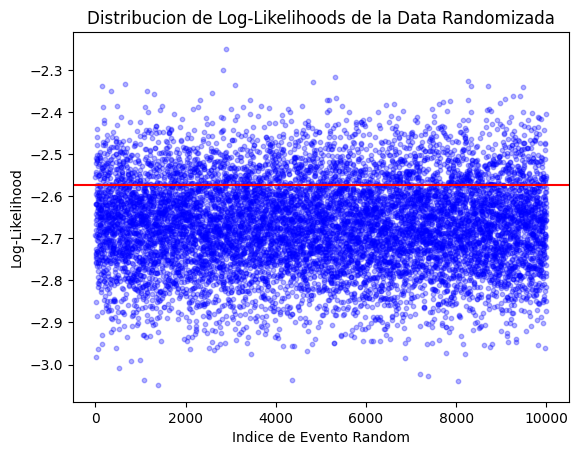

In [94]:
plt.scatter(np.arange(10000), log_likelihood_randomized, s = 10, color = 'b', alpha = 0.3)
plt.axhline(log_likelihood, color = "red")
plt.xlabel('Indice de Evento Random')
plt.ylabel('Log-Likelihood')
plt.title('Distribucion de Log-Likelihoods de la Data Randomizada')


In [95]:
data_likelihood*100

7.6322296987939495

We find a lot of random events with lower LL than the real distribution, random events that were created with a probability distribution derived from the independence hypothesis, that are given less likelihood than the observed data, this implies that the hypothesis of independence of SLiM and amyloid positions cant be discarded, we assume that the observed tendency to small distances is a result of the percentage of the protein length covered on average by amiloid regions, we then calculate this number.

In [96]:
average_amyloid_percentage = 0
for protein in protein_objects:
    total_amyloid_len = 0
    for amyloid_region in protein.amyloid_regions:
        total_amyloid_len += amyloid_region[1] - amyloid_region[0]
    average_amyloid_percentage += total_amyloid_len/protein.length

average_amyloid_percentage /= len(protein_objects)
    

In [97]:
print(average_amyloid_percentage)
bins = np.linspace(0, 100, 21) 
print(np.histogram(slims_amyloid_overlap, bins = bins)[0])

0.11604338467407946
[8 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]


In [98]:
print(2/8)

0.25


slims have some coverage by amyloid only in 25% of cases but that can be explained by amyloids covering on average only 11.6% of the length of the protein.

# Same analysis for amyloid distance to disordered regions

In [99]:
amyloid_proximities_dict = {}
amyloid_proximities = []
for protein in proteins:
    results = calculate_proximity(amylo_spans_dict[protein], disorder_spans[protein], len_dict[protein])
    amyloid_proximities_dict[protein] = results
    amyloid_proximities += results

amyloid_proximities = np.array(amyloid_proximities)

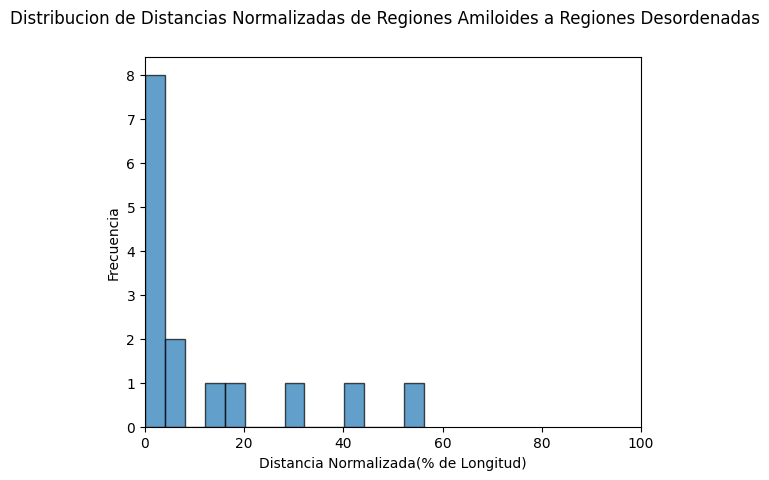

In [100]:
fig, ax = plt.subplots()
ax.hist(amyloid_proximities, bins=14, alpha=0.7, edgecolor='black')
fig.suptitle("Distribucion de Distancias Normalizadas de Regiones Amiloides a Regiones Desordenadas")
ax.set_xlim(0, 100)
ax.set_xlabel("Distancia Normalizada(% de Longitud)")
ax.set_ylabel("Frecuencia")
plt.show()

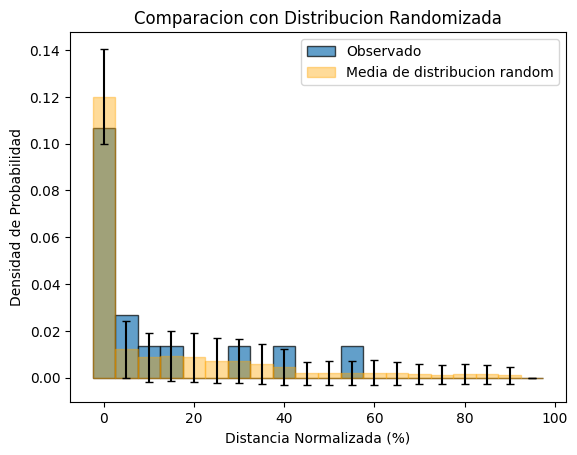

In [101]:
# Observed distances
observed_distances = amyloid_proximities

# Randomization
n_iterations = 10000
randomized_distances = []

for _ in range(n_iterations):
    iteration_distances = []
    for protein in protein_objects:
        randomized_amylos = []
        # Shuffle Amylos
        amylo_lengths = [amylo[1] - amylo[0] for amylo in protein.amyloid_regions]
        for length in amylo_lengths:
            start = random.randint(0, protein.length - length)
            randomized_amylos.append((start, start + length))
        # Compute distances
        iteration_distances.extend(calculate_proximity(randomized_amylos, protein.disordered_regions, protein.length))
    randomized_distances.append(iteration_distances)



# Convert randomized distances into histograms
bins = np.linspace(0, 100, 21)
observed_hist, _ = np.histogram(observed_distances, bins=bins, density=True)
randomized_hists = [np.histogram(r, bins=bins, density=True)[0] for r in randomized_distances]

# Calculate mean and standard deviation of randomized histograms
random_mean = np.mean(randomized_hists, axis=0)
random_std = np.std(randomized_hists, axis=0)

# Plot observed vs randomized histograms
plt.bar(bins[:-1], observed_hist, width=5, alpha=0.7, label="Observado", edgecolor="black")

bars = plt.bar(
    bins[:-1],
    random_mean,
    width=5,
    alpha=0.4,
    color="orange",
    label="Media de distribucion random",
    edgecolor = "orange",
    yerr=random_std,  # Add error bars
    capsize=3         # Add caps to the error bars
)

plt.title("Comparacion con Distribucion Randomizada")
plt.xlabel("Distancia Normalizada (%)")
plt.ylabel("Densidad de Probabilidad")
plt.legend()
plt.show()

In [102]:
random_distribution = random_mean/np.sum(random_mean)
observed_distribution = observed_hist/np.sum(observed_hist)
epsilon = 1e-10
random_distribution += epsilon
log_likelihood = np.sum(observed_distribution * np.log(random_distribution))
print(log_likelihood)



-1.840777148548682


In [103]:
print(len(sum([[slim for slim in protein.slims] for protein in protein_objects],[])))

35


In [104]:
for protein in protein_objects:
    print(protein.name)

P04637
P05067
P10636
Q71U36
P04004
P10275
P06748
P22303
P04156
P37840
